In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
from tqdm import tqdm
from model.neuralMNIST import NeuralNetwork
from model.neuralMNIST import CategoryEntropy
from model.neuralMNIST import sparse_to_one_hot

In [2]:
train_data = pd.read_csv("/content/sample_data/mnist_train_small.csv")
train_images = train_data.iloc[:, 1:].values    #   shape(19999, 1, 28, 28)
train_labels = train_data.iloc[:, 0].values
print(train_images.shape)
print(train_labels[0])

(19999, 784)
5


In [3]:
test_datanlabel = pd.read_csv("/content/sample_data/mnist_test.csv")
test_images = test_datanlabel.iloc[:, 1:].values    #   shape(19999, 1, 28, 28)
test_labels = test_datanlabel.iloc[:, 0].values

print(test_images.shape)
print(test_labels[0])

(9999, 784)
2


In [4]:
myNeuralNet = NeuralNetwork(input_size=28*28, hidden_layers=[512, 512], output_size=10)

In [5]:
data = train_images
datalabels = train_labels

data = (data.astype(np.float32)-127.5) / 127.5
accuracies = []
losses = []

BATCH_SIZE = 32


for epoch in range(1, 10):
    train_steps = len(data) // BATCH_SIZE

    for step in tqdm(range(train_steps), desc=f'Epoch {epoch}'):
        batch_X = data[step * BATCH_SIZE:(step + 1) * BATCH_SIZE]
        batch_y = datalabels[step * BATCH_SIZE:(step + 1) * BATCH_SIZE]

        X = batch_X
        y = batch_y
        output = myNeuralNet.forward(X)

        if step % 100 == 0:
            predictions = np.argmax(output, axis=1)
            if len(y.shape) == 2:
                y = np.argmax(y, axis=1)
            accuracy = np.mean(predictions == y)
            loss = CategoryEntropy(output, sparse_to_one_hot(y, 10))
            accuracies.append(accuracy)
            losses.append(loss)

            print(f'epoch:{epoch}, acc: {accuracy:.3f}, loss: {loss:.3f}')

        myNeuralNet.backwards(y)
        myNeuralNet.updateParams(lr=0.01, decay=1e-2)
        myNeuralNet.gradientsWeights = []
        myNeuralNet.gradientsBiases = []

Epoch 1:   1%|          | 7/624 [00:00<00:09, 64.79it/s]

epoch:1, acc: 0.188, loss: 2.294


Epoch 1:  18%|█▊        | 112/624 [00:01<00:06, 81.40it/s]

epoch:1, acc: 0.312, loss: 2.208


Epoch 1:  34%|███▍      | 214/624 [00:02<00:04, 85.21it/s]

epoch:1, acc: 0.469, loss: 2.139


Epoch 1:  51%|█████     | 316/624 [00:03<00:03, 95.49it/s]

epoch:1, acc: 0.531, loss: 2.039


Epoch 1:  67%|██████▋   | 420/624 [00:04<00:02, 98.03it/s]

epoch:1, acc: 0.625, loss: 2.017


Epoch 1:  82%|████████▏ | 513/624 [00:05<00:01, 97.41it/s]

epoch:1, acc: 0.688, loss: 1.864


Epoch 1:  97%|█████████▋| 608/624 [00:07<00:00, 52.90it/s]

epoch:1, acc: 0.469, loss: 1.848


Epoch 2:   1%|          | 4/624 [00:00<00:15, 38.79it/s]

epoch:2, acc: 0.500, loss: 1.844


Epoch 2:  17%|█▋        | 105/624 [00:02<00:12, 41.53it/s]

epoch:2, acc: 0.688, loss: 1.632


Epoch 2:  33%|███▎      | 208/624 [00:03<00:04, 92.54it/s]

epoch:2, acc: 0.688, loss: 1.638


Epoch 2:  50%|█████     | 315/624 [00:04<00:03, 80.19it/s]

epoch:2, acc: 0.719, loss: 1.541


Epoch 2:  66%|██████▌   | 411/624 [00:05<00:02, 89.48it/s]

epoch:2, acc: 0.719, loss: 1.590


Epoch 2:  82%|████████▏ | 511/624 [00:07<00:01, 89.52it/s]

epoch:2, acc: 0.750, loss: 1.403


Epoch 2:  98%|█████████▊| 610/624 [00:08<00:00, 85.09it/s]

epoch:2, acc: 0.562, loss: 1.495


Epoch 3:   2%|▏         | 10/624 [00:00<00:06, 97.13it/s]

epoch:3, acc: 0.594, loss: 1.481


Epoch 3:  19%|█▊        | 116/624 [00:01<00:05, 89.76it/s]

epoch:3, acc: 0.781, loss: 1.253


Epoch 3:  34%|███▍      | 212/624 [00:02<00:04, 93.23it/s]

epoch:3, acc: 0.750, loss: 1.312


Epoch 3:  50%|████▉     | 311/624 [00:03<00:03, 86.12it/s]

epoch:3, acc: 0.750, loss: 1.240


Epoch 3:  65%|██████▍   | 403/624 [00:05<00:04, 47.43it/s]

epoch:3, acc: 0.750, loss: 1.345


Epoch 3:  83%|████████▎ | 517/624 [00:08<00:01, 63.73it/s]

epoch:3, acc: 0.844, loss: 1.140


Epoch 3:  98%|█████████▊| 614/624 [00:09<00:00, 81.50it/s]

epoch:3, acc: 0.594, loss: 1.302


Epoch 4:   2%|▏         | 11/624 [00:00<00:05, 108.37it/s]

epoch:4, acc: 0.625, loss: 1.270


Epoch 4:  19%|█▊        | 116/624 [00:01<00:05, 92.51it/s]

epoch:4, acc: 0.812, loss: 1.058


Epoch 4:  35%|███▌      | 219/624 [00:02<00:04, 94.48it/s]

epoch:4, acc: 0.781, loss: 1.135


Epoch 4:  50%|████▉     | 311/624 [00:03<00:03, 89.77it/s]

epoch:4, acc: 0.781, loss: 1.075


Epoch 4:  67%|██████▋   | 416/624 [00:04<00:02, 99.52it/s]

epoch:4, acc: 0.750, loss: 1.209


Epoch 4:  82%|████████▏ | 512/624 [00:05<00:01, 98.94it/s]

epoch:4, acc: 0.844, loss: 0.988


Epoch 4:  98%|█████████▊| 614/624 [00:06<00:00, 94.98it/s]

epoch:4, acc: 0.625, loss: 1.188


Epoch 5:   2%|▏         | 10/624 [00:00<00:06, 92.65it/s]

epoch:5, acc: 0.625, loss: 1.144


Epoch 5:  18%|█▊        | 110/624 [00:01<00:05, 93.68it/s]

epoch:5, acc: 0.812, loss: 0.947


Epoch 5:  33%|███▎      | 206/624 [00:03<00:08, 51.05it/s]

epoch:5, acc: 0.781, loss: 1.028


Epoch 5:  51%|█████     | 319/624 [00:05<00:03, 78.41it/s]

epoch:5, acc: 0.812, loss: 0.975


Epoch 5:  67%|██████▋   | 419/624 [00:06<00:02, 94.21it/s]

epoch:5, acc: 0.750, loss: 1.126


Epoch 5:  83%|████████▎ | 519/624 [00:07<00:01, 95.31it/s]

epoch:5, acc: 0.875, loss: 0.891


Epoch 5:  98%|█████████▊| 610/624 [00:08<00:00, 95.70it/s]

epoch:5, acc: 0.656, loss: 1.114


Epoch 6:   2%|▏         | 11/624 [00:00<00:05, 104.91it/s]

epoch:6, acc: 0.719, loss: 1.061


Epoch 6:  18%|█▊        | 115/624 [00:01<00:05, 97.22it/s]

epoch:6, acc: 0.812, loss: 0.876


Epoch 6:  35%|███▌      | 219/624 [00:02<00:04, 93.97it/s]

epoch:6, acc: 0.781, loss: 0.957


Epoch 6:  50%|████▉     | 310/624 [00:03<00:03, 93.13it/s]

epoch:6, acc: 0.844, loss: 0.909


Epoch 6:  66%|██████▌   | 411/624 [00:04<00:02, 87.45it/s]

epoch:6, acc: 0.750, loss: 1.069


Epoch 6:  82%|████████▏ | 511/624 [00:05<00:01, 85.59it/s]

epoch:6, acc: 0.906, loss: 0.823


Epoch 6:  96%|█████████▌| 600/624 [00:06<00:00, 64.91it/s]

epoch:6, acc: 0.656, loss: 1.061


Epoch 7:   1%|          | 6/624 [00:00<00:10, 57.43it/s]

epoch:7, acc: 0.688, loss: 1.001


Epoch 7:  17%|█▋        | 108/624 [00:02<00:11, 43.91it/s]

epoch:7, acc: 0.812, loss: 0.826


Epoch 7:  35%|███▍      | 218/624 [00:03<00:04, 89.72it/s]

epoch:7, acc: 0.781, loss: 0.906


Epoch 7:  51%|█████     | 318/624 [00:04<00:03, 93.17it/s]

epoch:7, acc: 0.844, loss: 0.861


Epoch 7:  66%|██████▌   | 413/624 [00:05<00:02, 95.38it/s]

epoch:7, acc: 0.750, loss: 1.029


Epoch 7:  83%|████████▎ | 517/624 [00:06<00:01, 95.44it/s]

epoch:7, acc: 0.906, loss: 0.773


Epoch 7:  98%|█████████▊| 610/624 [00:07<00:00, 93.99it/s]

epoch:7, acc: 0.656, loss: 1.020


Epoch 8:   2%|▏         | 11/624 [00:00<00:05, 103.59it/s]

epoch:8, acc: 0.656, loss: 0.957


Epoch 8:  19%|█▊        | 116/624 [00:01<00:05, 93.45it/s]

epoch:8, acc: 0.812, loss: 0.790


Epoch 8:  34%|███▍      | 211/624 [00:02<00:04, 92.17it/s]

epoch:8, acc: 0.781, loss: 0.867


Epoch 8:  50%|█████     | 315/624 [00:03<00:03, 97.61it/s]

epoch:8, acc: 0.844, loss: 0.826


Epoch 8:  67%|██████▋   | 418/624 [00:04<00:02, 96.29it/s]

epoch:8, acc: 0.750, loss: 0.998


Epoch 8:  81%|████████  | 505/624 [00:05<00:02, 52.86it/s]

epoch:8, acc: 0.906, loss: 0.734


Epoch 8:  97%|█████████▋| 608/624 [00:08<00:00, 46.25it/s]

epoch:8, acc: 0.688, loss: 0.988


Epoch 9:   3%|▎         | 20/624 [00:00<00:06, 99.20it/s]

epoch:9, acc: 0.656, loss: 0.922


Epoch 9:  18%|█▊        | 114/624 [00:01<00:05, 97.49it/s]

epoch:9, acc: 0.812, loss: 0.761


Epoch 9:  35%|███▌      | 219/624 [00:02<00:04, 96.58it/s]

epoch:9, acc: 0.812, loss: 0.837


Epoch 9:  50%|█████     | 315/624 [00:03<00:03, 101.49it/s]

epoch:9, acc: 0.844, loss: 0.799


Epoch 9:  67%|██████▋   | 421/624 [00:04<00:02, 101.42it/s]

epoch:9, acc: 0.750, loss: 0.973


Epoch 9:  82%|████████▏ | 514/624 [00:05<00:01, 96.76it/s]

epoch:9, acc: 0.875, loss: 0.703


Epoch 9:  99%|█████████▉| 618/624 [00:06<00:00, 97.49it/s]

epoch:9, acc: 0.688, loss: 0.961


Epoch 9: 100%|██████████| 624/624 [00:06<00:00, 95.41it/s]


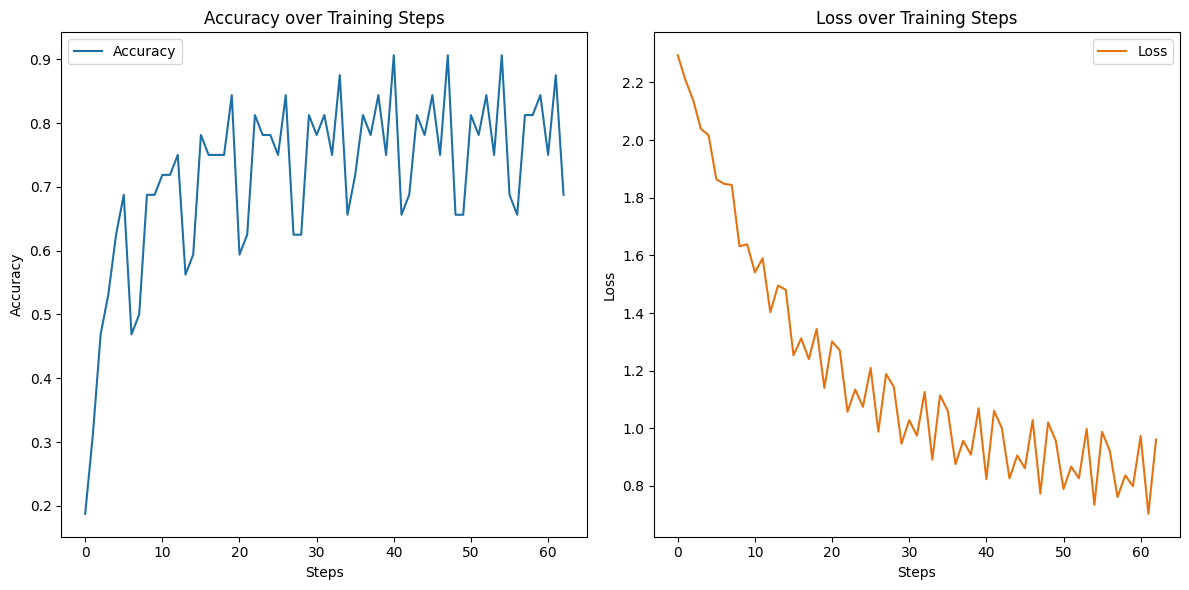

In [6]:
# 假设你在训练过程中已经累积了准确率和损失的值
# accuracies 和 losses 是你已经累积的数据列表

# 创建绘图窗口
plt.figure(figsize=(12, 6))

# 绘制准确率变化图
plt.subplot(1, 2, 1)  # 创建1行2列的子图，选择第1个子图
plt.plot(accuracies, label='Accuracy', color='#1d6fa5')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.title('Accuracy over Training Steps')
plt.legend()

# 绘制损失变化图
plt.subplot(1, 2, 2)  # 创建1行2列的子图，选择第2个子图
plt.plot(losses, label='Loss', color='#e57211')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Loss over Training Steps')
plt.legend()

# 显示图像
plt.tight_layout()  # 自动调整子图参数以适应图像区域
plt.show()

In [7]:
data_test = (test_images.astype(np.float32)-127.5) / 127.5
X = data_test
y = test_labels

output = myNeuralNet.forward(data_test)
predictions = np.argmax(output, axis=1)
if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions==y)
print(accuracy)

0.8166816681668166


[[4.65779226e-060 2.53583658e-154 1.23756685e-047 4.33751753e-106
  1.73593534e-082 4.93720114e-078 1.00000000e+000 3.09009650e-166
  1.55419199e-064 3.97024364e-116]]
预测结果为[6]


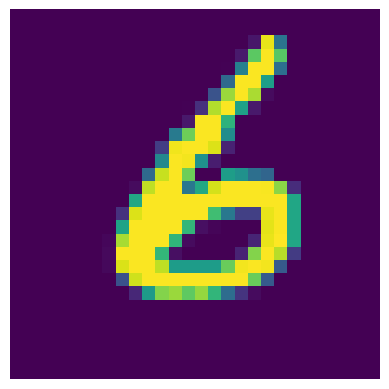

In [8]:
image = test_images[random.randint(1, 9999)]
output = myNeuralNet.forward(image)
print(output)
prediction = np.argmax(output, axis=1)
print(f"预测结果为{prediction}")
plt.imshow(image.reshape(28, 28))
plt.axis('off')
plt.show()
